# Practice: Data Cleaning

In [9]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = None
sns.sea
pd.options.display.max_columns = None


AttributeError: module 'seaborn' has no attribute 'sea'

c:\Users\ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='totalamount', ylabel='Count'>

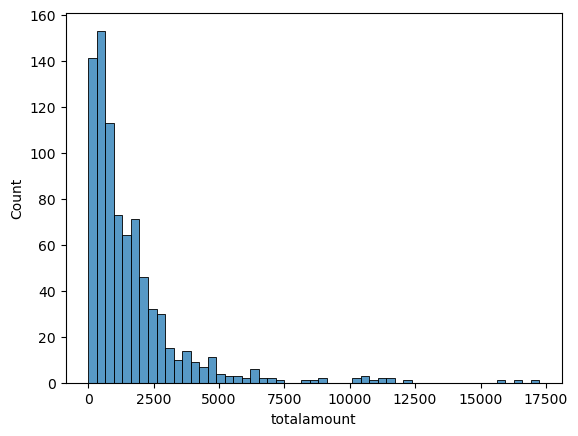

c:\Users\ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


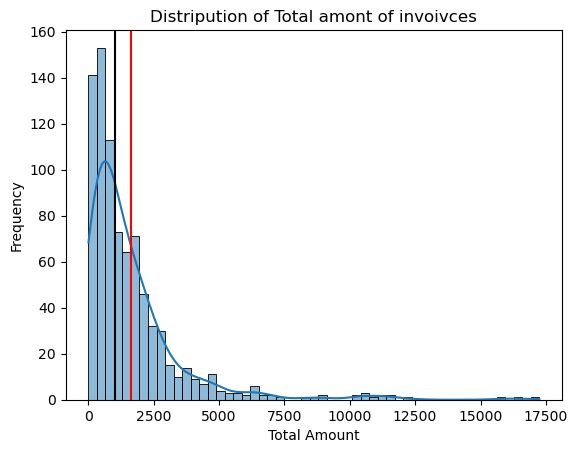

In [16]:
sns.histplot(data=orders,x ='totalamount',kde=True)
plt.title('Distripution of Total amont of invoivces')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.axvline(orders.totalamount.mean(), color ='red')
plt.axvline(orders.totalamount.median(), color = 'black')

In [23]:
min = orders.totalamount.min()
q1 = orders.totalamount.quantile(0.1)
q2 = orders.totalamount.median()
q3 = orders.totalamount.quantile(0.9)


IQR = q3 - q1

LB = q1 - (1.5 + IQR)
UB = q3 + (1.5 + IQR)
print(f'min = {min},q1 = {q1}, q2 = {q2},q3={q3},IQR = {IQR}, LB = {LB}, UB = {UB}')

min = 12.5,q1 = 200.0, q2 = 1015.9,q3=3529.4600000000014,IQR = 3329.4600000000014, LB = -3130.9600000000014, UB = 6860.420000000003


In [25]:
orders[orders.totalamount > UB].count()

customerid     21
firstname      21
lastname       21
city           21
country        21
orderid        21
ordernumber    21
orderdate      21
totalamount    21
dtype: int64

<Axes: xlabel='totalamount'>

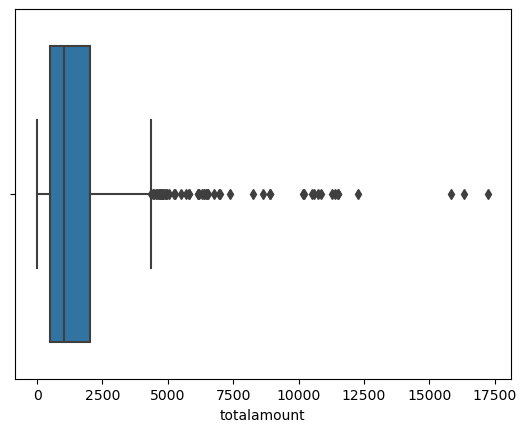

In [18]:
sns.boxplot(data=orders,x ='totalamount')

In [21]:
px.box(data_frame=orders, x ='totalamount')

In [4]:
# Wrangle Function

def wrangle (filename, encoding = None, dropna_columnnames = None, change_column_name= None, date_column= None, remove_duplicated_rows_columnsname = None):
    # Loading Data from csv file
    df = pd.read_csv(filename, encoding= encoding)

    ### Get Orders NaN Rows
    df.dropna(subset= dropna_columnnames, inplace=True)

    # Rename Columns
    df = df.rename(columns= change_column_name)

    # Change OrderDate and ID Columns type to Date, integer
    df[date_column] = pd.to_datetime(df[date_column])

    #Drop dupliacted rows
    df = df.drop_duplicates(subset= remove_duplicated_rows_columnsname)


    #Strip and lowercase columns names
    df.columns = df.columns.str.strip().str.lower()

    return df

In [26]:
orders = orders[orders.totalamount < 17000]

In [27]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 829 entries, 0 to 2130
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customerid   829 non-null    float64       
 1   firstname    829 non-null    object        
 2   lastname     829 non-null    object        
 3   city         829 non-null    object        
 4   country      829 non-null    object        
 5   orderid      829 non-null    float64       
 6   ordernumber  829 non-null    float64       
 7   orderdate    829 non-null    datetime64[ns]
 8   totalamount  829 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 64.8+ KB


In [28]:
orders.city.value_counts()

city
London             46
Rio de Janeiro     34
Sao Paulo          31
Boise              31
Graz               30
México D.F.        28
Cunewalde          27
Cork               19
Br?cke             19
San Crist?bal      18
Albuquerque        18
Lule?              18
Marseille          17
Buenos Aires       16
Frankfurt a.M.     15
Oulu               15
München            15
Brandenburg        14
Tsawassen          14
Toulouse           14
Seattle            14
Barquisimeto       14
Montréal           13
Lisboa             13
I. de Margarita    12
Reggio Emilia      12
Portland           12
Charleroi          12
?rhus              11
Eugene             11
Strasbourg         11
Genève             10
Lyon               10
Bergamo            10
Stuttgart          10
Sevilla            10
Anchorage          10
Salzburg           10
Cowes              10
K?ln               10
Campinas            9
Resende             9
Lander              9
Bern                8
Madrid              8
Bruxe

In [29]:
px.bar(data_frame=orders.city.value_counts(),title = 'Distrption of Cities')

In [30]:
px.pie(data_frame=orders, names='country', title = 'Relative Frequency of Countries Sales')

In [32]:
#Through the preliminary analysis, we see that London is the city that has the largest share of purchasing our products with 46 invoices, and that the USA and Germany are the most purchasing countries for our products with 121 invoices and 14.6% of our total sales.

In [33]:
#Bivariate Analysis

SyntaxError: invalid syntax (2690137816.py, line 1)

In [34]:
orders.groupby('country', as_index=False)['totalamount'].sum().sort_values('totalamount',ascending=False)

,country,totalamount
19,USA,"263,566.98"
8,Germany,"227,390.63"
1,Austria,"139,496.63"
3,Brazil,"114,968.48"
7,France,"85,498.76"
20,Venezuela,"60,814.89"
18,UK,"60,616.51"
16,Sweden,"59,523.70"
9,Ireland,"57,317.39"
4,Canada,"55,334.10"


In [36]:
def plots(columname, Top10=False):

    prop = orders.groupby(columname,as_index=False)['totalamount'].sum()
    prop['proporation'] = (prop.totalamount/ orders.totalamount.sum()) *100
    prop = prop.sort_values('proporation',ascending=False)
    print('Describe of all Total amount values',prop.totalamount.describe())
    if Top10 ==True:
        prop = prop.head(10)


fig1=px.bar(data_frame=prop, x=columname , y ='totalname')
fig2=px.bar(data_frame=prop,names=columname,values = 'totalname')

NameError: name 'prop' is not defined

### Issues:
* Delete orders with NaN values
* Rename `City.1, Country.1, Phon.1` Columns
* Change `OrderDate` Type into Date
* Change ID Columns, and OrderNumber column to integer

In [5]:
orders = wrangle('all_data.csv', encoding= 'latin-1' , dropna_columnnames= ['OrderID'], change_column_name= {'City.1' : 'SuppCity', 'Country.1' : 'SuppCountry', 'Phone.1' : 'Supp_Phone'}, date_column= 'OrderDate', remove_duplicated_rows_columnsname= ['OrderID'])

for cols in orders.columns:
    if 'ID' in cols or 'OrderNumber' in cols:
         orders[cols] = orders[cols].astype(int)

orders = orders[['customerid', 'firstname', 'lastname', 'city', 'country', 'orderid', 'ordernumber', 'orderdate', 'totalamount' ]]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 2130
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customerid   830 non-null    float64       
 1   firstname    830 non-null    object        
 2   lastname     830 non-null    object        
 3   city         830 non-null    object        
 4   country      830 non-null    object        
 5   orderid      830 non-null    float64       
 6   ordernumber  830 non-null    float64       
 7   orderdate    830 non-null    datetime64[ns]
 8   totalamount  830 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 64.8+ KB


In [6]:
orders[['totalamount']].describe().T

,count,mean,std,min,25%,50%,75%,max
totalamount,830.00,"1,631.88","1,990.61",12.50,480.00,"1,015.90","2,028.65","17,250.00"


In [ ]:
orders.select_dtypes('object').nunique()

firstname    84
lastname     88
city         69
country      21
dtype: int64

In [7]:
orders.totalamount.describe()

count      830.00
mean     1,631.88
std      1,990.61
min         12.50
25%        480.00
50%      1,015.90
75%      2,028.65
max     17,250.00
Name: totalamount, dtype: float64

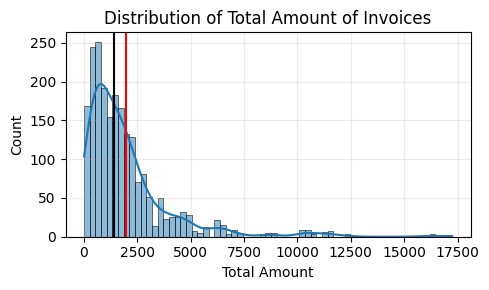

In [ ]:
# We need to know why mean > median, using histogram to know the shape of data
fig, ax = plt.subplots(1,1, figsize=(5,3), sharey=True)
#---------------------------------
sns.histplot(data=df, x = 'totalamount', ax=ax, kde=True)
ax.axvline(df.totalamount.mean(), color='r')
ax.axvline(df.totalamount.median(), color='black')
ax.set_title('Distribution of Total Amount of Invoices')
ax.set_xlabel('Total Amount')
#-------------------------------
plt.grid(alpha=0.25)
plt.tight_layout();

In [ ]:
# Boxplot to know the 5 number summary
px.box(data_frame=df, x = 'totalamount')

In [ ]:
px.bar(data_frame=orders.country.value_counts())

In [ ]:
city_group= orders.groupby(['country', 'city'], as_index=False)['orderid'].count().sort_values(by='orderid',ascending=False)

In [ ]:
px.bar(data_frame= city_group, x='city', y='orderid', color='country')

In [ ]:
lb, ub = orders.totalamount.mean() - (3 * orders.totalamount.std()), orders.totalamount.mean() + (3 * orders.totalamount.std())
lb,ub

(-4339.964070696104, 7603.719709250319)

In [ ]:
orders = orders[orders.totalamount.between(lb,ub)]

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 812 entries, 0 to 2130
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customerid   812 non-null    int32         
 1   firstname    812 non-null    object        
 2   lastname     812 non-null    object        
 3   city         812 non-null    object        
 4   country      812 non-null    object        
 5   orderid      812 non-null    int32         
 6   ordernumber  812 non-null    int32         
 7   orderdate    812 non-null    datetime64[ns]
 8   totalamount  812 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int32(3), object(4)
memory usage: 53.9+ KB


In [ ]:
orders.describe()['totalamount'].T

count     812.00
mean    1,415.57
min        12.50
25%       477.00
50%       979.75
75%     1,924.56
max     7,390.20
std     1,322.84
Name: totalamount, dtype: float64

In [ ]:
px.bar(data_frame=orders.country.value_counts())

In [ ]:
city_group= orders.groupby(['country', 'city'], as_index=False)['orderid'].count().sort_values(by='orderid',ascending=False)

In [ ]:
px.bar(data_frame= city_group, x='city', y='orderid', color='country')

In [ ]:
sns.count

84